In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from ConfusionMatrix import ConfusionMatrix
from save_metric_plot import plot_accuracy_loss
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Computer Modern Sans serif']})
rc('text', usetex=True)

In [2]:
labels_subset = np.load('./Plots/labels_CM_subset.npy', allow_pickle=True)
labels = np.load('./Plots/labels_CM.npy', allow_pickle=True)

In [3]:
f = 'fine_tune_VGG16_no_edge_frames_2020-01-29-10:52:23'

In [4]:
cm = ConfusionMatrix(labels_subset, 
                     cm_file=f)

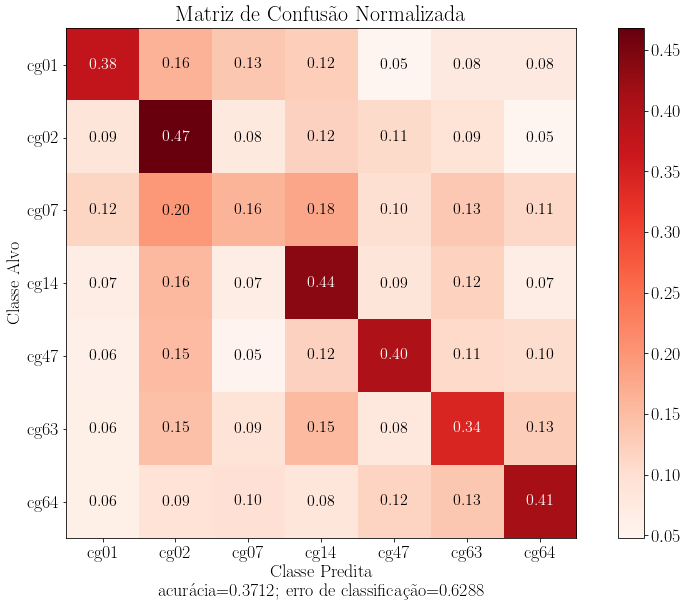

In [5]:
cm.plot_figure(rotation=0, save_fig=True)

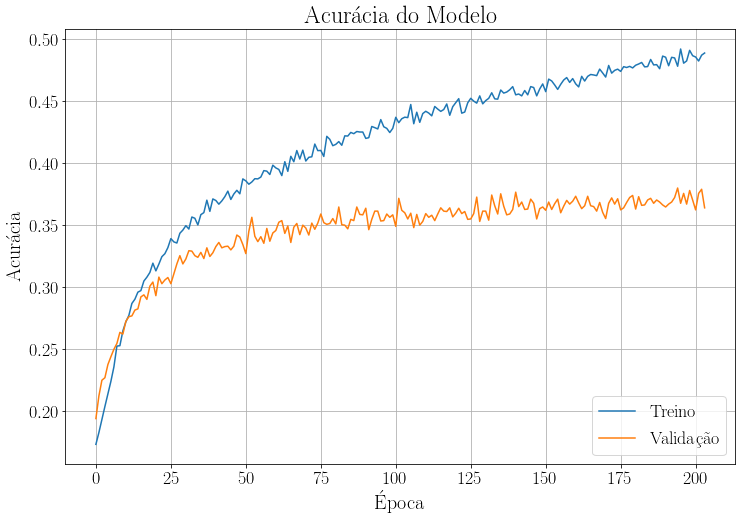

In [6]:
plot_accuracy_loss(f, metric='accuracy', save_fig=True)

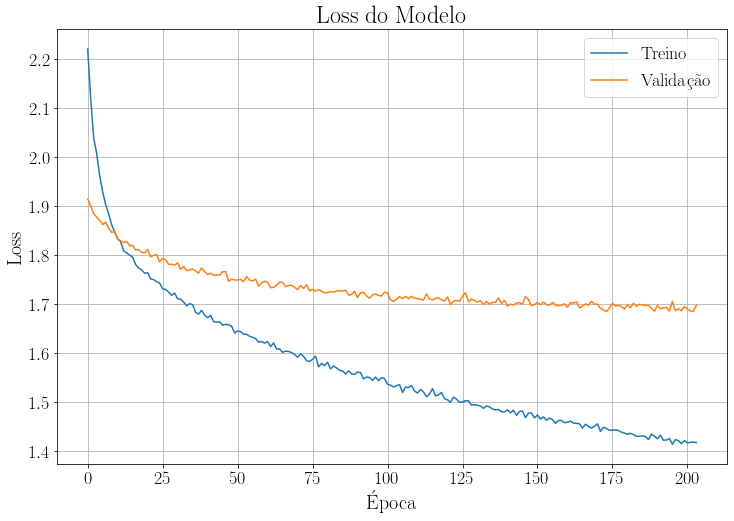

In [7]:
plot_accuracy_loss(f, metric='loss', save_fig=True)

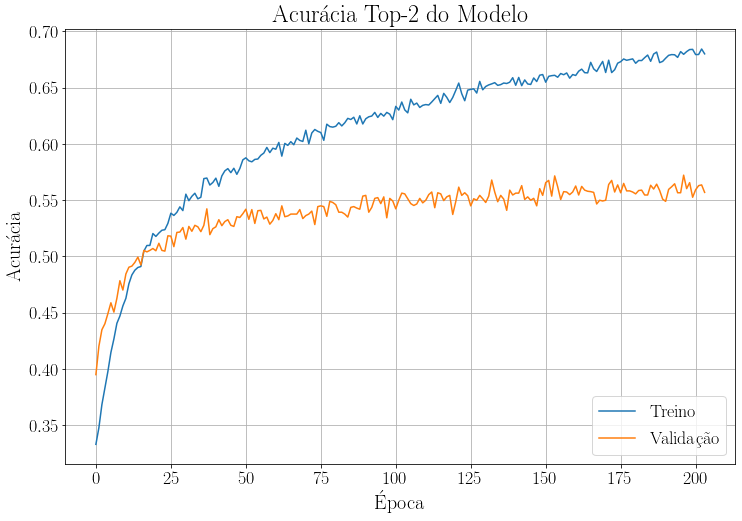

In [8]:
plot_accuracy_loss(f, metric='top_2_accuracy', save_fig=True)

In [9]:
df = pd.read_csv('./Metrics/classification_report_' + f + '_subset.csv')

In [10]:
df

,Unnamed: 0,precision,recall,f1-score,support
0,cg01,0.130435,0.375000,0.193548,104.000000
1,cg02,0.282640,0.467933,0.352415,421.000000
2,cg07,0.138554,0.161972,0.149351,284.000000
3,cg14,0.535585,0.437438,0.481562,1015.000000
4,cg47,0.241546,0.401606,0.301659,249.000000
5,cg63,0.629679,0.341552,0.442877,1379.000000
6,cg64,0.295503,0.413174,0.344569,334.000000
7,accuracy,0.379028,0.379028,0.379028,0.379028
8,macro avg,0.321992,0.371239,0.323712,3786.000000
9,weighted avg,0.460300,0.379028,0.396361,3786.000000


In [11]:
classes_report = df[:7]

In [12]:
classes_report.describe()

,precision,recall,f1-score,support
count,7.000000,7.000000,7.000000,7.000000
mean,0.321992,0.371239,0.323712,540.857143
std,0.191206,0.100913,0.121248,470.186285
min,0.130435,0.161972,0.149351,104.000000
25%,0.190050,0.358276,0.247604,266.500000
50%,0.282640,0.401606,0.344569,334.000000
75%,0.415544,0.425306,0.397646,718.000000
max,0.629679,0.467933,0.481562,1379.000000
